<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/K_mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()



'/content'

In [5]:
df= pd.read_csv("drive/MyDrive/DATA/bank.csv")

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.shape

(4521, 17)

In [8]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [9]:
df.value_counts()

age  job            marital   education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  y  
87   retired        married   primary    no        230     no       no    cellular  30   oct    144       1         -1     0         unknown   yes    1
35   blue-collar    married   secondary  no       -339     yes      no    unknown   8    may    389       2         -1     0         unknown   no     1
                              primary    no        319     yes      no    cellular  16   jul    221       1         -1     0         unknown   no     1
                                                   378     yes      no    unknown   16   may    427       3         -1     0         unknown   no     1
                                                   422     yes      no    cellular  14   may    73        1         -1     0         unknown   no     1
                                                                                             

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
df['age'].unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])

In [13]:
df['pdays'].min()

-1

In [14]:
df['duration'].unique()

array([  79,  220,  185,  199,  226,  141,  341,  151,   57,  313,  273,
        113,  328,  261,   89,  189,  239,  114,  250,  148,   96,  140,
        109,  125,  169,  182,  247,  119,  149,   74,  897,   81,   40,
        958,  354,  150,   97,  132,  765,   16,  609,  106,  365,  205,
         11,  105,   59,  425,  204,  181, 1018, 1740,   98,  441,  272,
        159,  295,  314,  579,  554,  323,  227,  134,  223,  155,  130,
        630,  164,  268,  380,  154,  221,   67,  367,   87,  701,  652,
         63,  398,  224,  406,   60,  521,  279,  203,  201,  372,  391,
        165,  231,  291,  233,  473,  736,  337,  553,  345,   65,    9,
        259,  371,  280,  243,  435,  258,    7,  317,   76,  170,  386,
         83,   69,  564,  588,  779,  281, 1877,   51,   32,  176,  161,
        187,   24,   85,  236,   54,   71,  489,   39,  455,   86,  190,
         45,  168,  194,  103,  333,  102,   92,  213,  289,   77,  324,
         84,   10,   35,   82,  676,   80,  549,  1

In [15]:
df['duration'].max()

3025

(0.0, 3100.0)

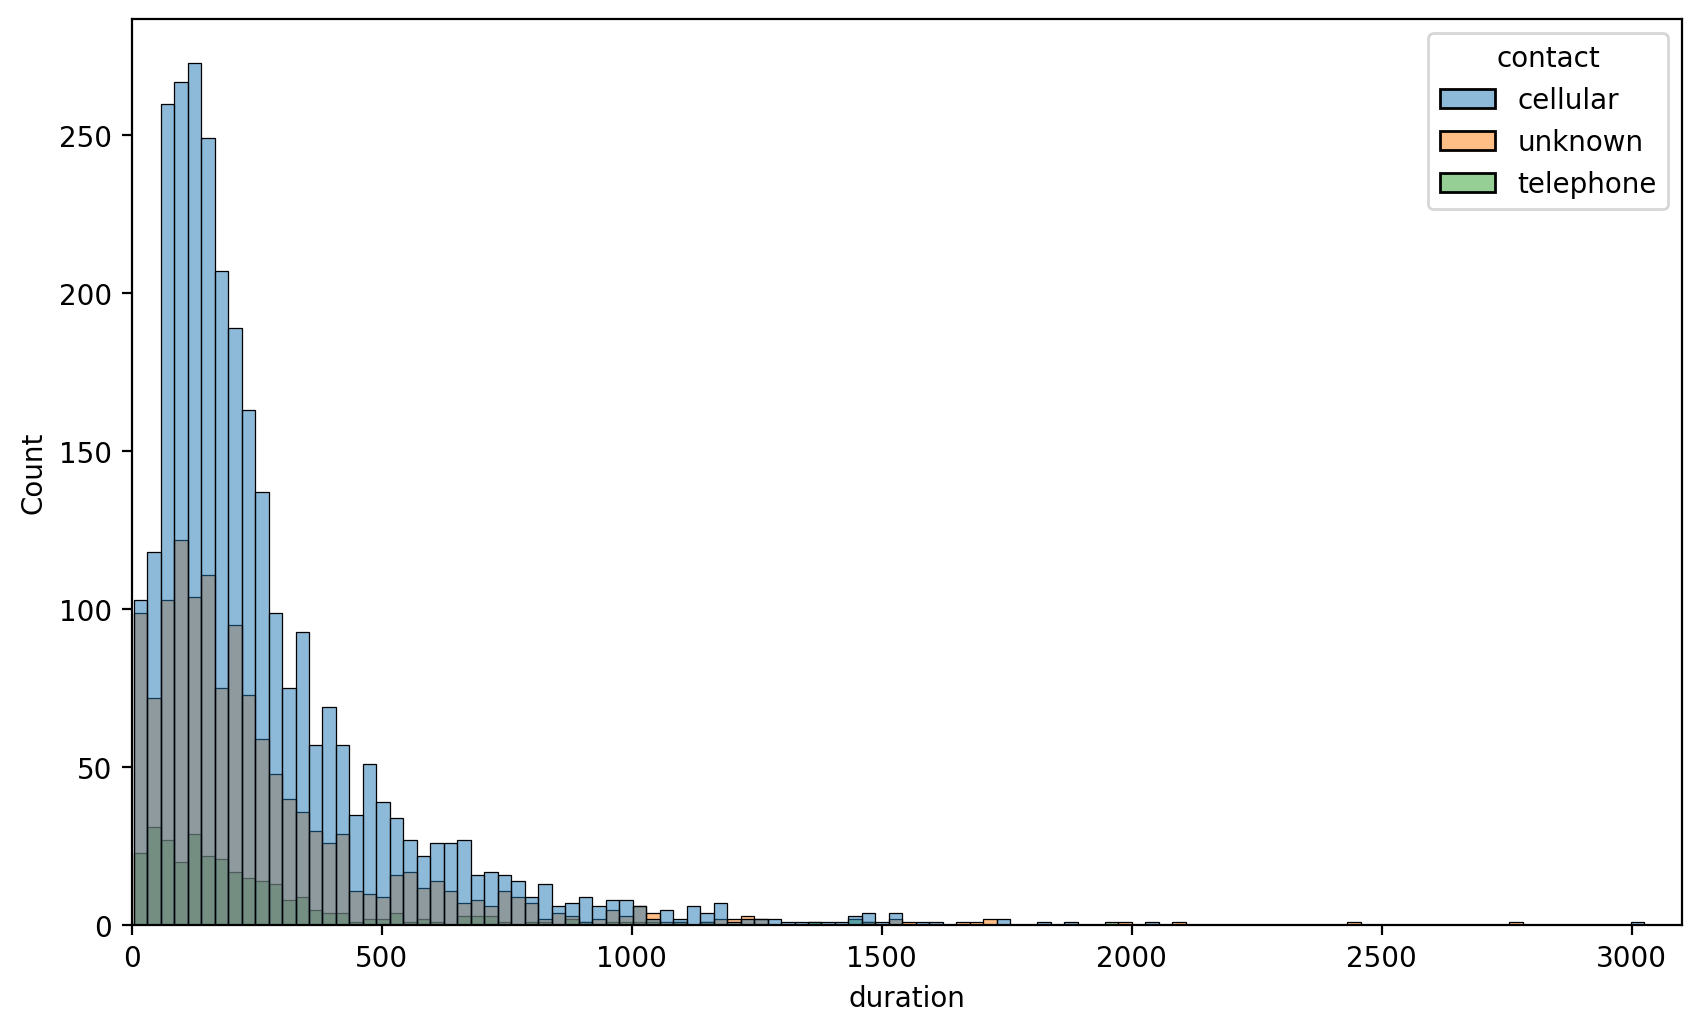

In [16]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 3100)

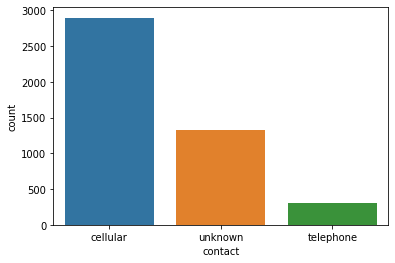

In [17]:
sns.countplot(data=df, x='contact')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

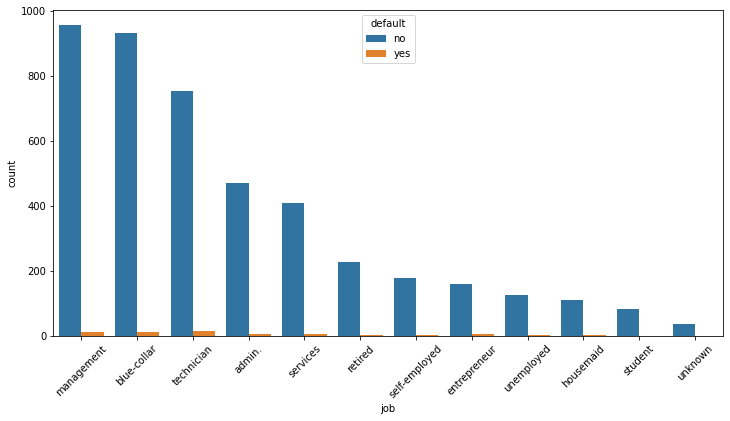

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, hue ='default')
plt.xticks(rotation=45)

In [19]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [20]:
X= pd.get_dummies(df)

In [21]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X=scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters=2)

In [27]:
cluster_labels=model.fit_predict(scaled_X)

In [28]:
cluster_labels

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [29]:
X['Cluster'] = cluster_labels

In [30]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes,Cluster
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


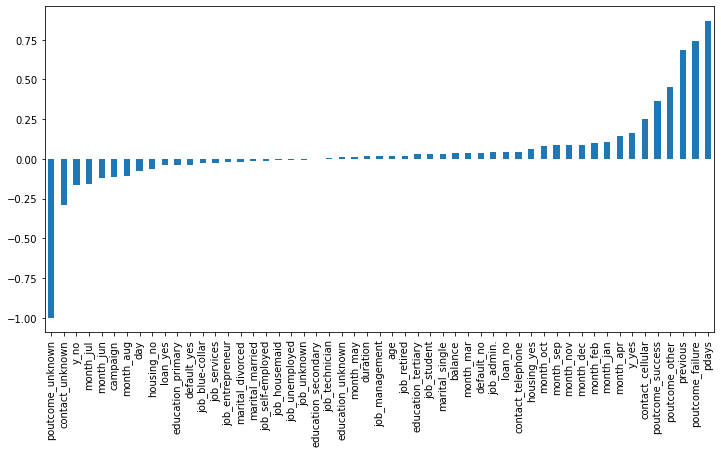

In [31]:
plt.figure(figsize=(12,6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [32]:
SSD=[]

for k in range(2,10):
    model= KMeans(n_clusters=k)
    model.fit(scaled_X)

    SSD.append(model.inertia_)

In [33]:
SSD

[223874.76090922538,
 212604.32322840937,
 203803.51769711846,
 199228.56668995897,
 192804.91354535005,
 188055.42675105098,
 182709.07881680055,
 177944.29806527216]

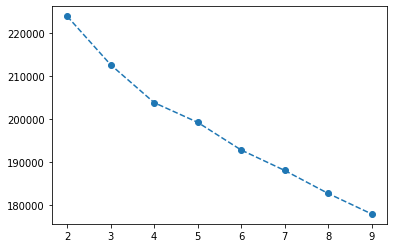

In [34]:
plt.plot(range(2,10), SSD, 'o--')

In [35]:
pd.Series(SSD)

0    223874.760909
1    212604.323228
2    203803.517697
3    199228.566690
4    192804.913545
5    188055.426751
6    182709.078817
7    177944.298065
dtype: float64

In [36]:
pd.Series(SSD).diff()

0             NaN
1   -11270.437681
2    -8800.805531
3    -4574.951007
4    -6423.653145
5    -4749.486794
6    -5346.347934
7    -4764.780752
dtype: float64

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
os.getcwd()

'/content'

In [40]:
import matplotlib.image as mpimg

In [45]:
image_as_array = mpimg.imread('drive/MyDrive/DATA/palm_trees.jpg')

In [56]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [51]:
image_as_array.shape # H, W, C

(1401, 934, 3)

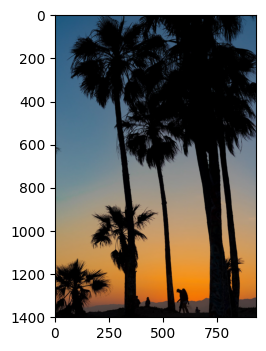

In [49]:
plt.figure(dpi=100)
plt.imshow(image_as_array)

In [ ]:
#(H,W,C) -- > 2D (H*W, C)

In [52]:
(h,w,c) = image_as_array.shape

In [53]:
h

1401

In [57]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [58]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [59]:
len(image_as_array2d.shape)

2

In [61]:
model1=KMeans(n_clusters=6)

In [62]:
labels = model1.fit_predict(image_as_array2d)

In [63]:
labels

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [65]:
rgb_codes = model1.cluster_centers_.round(0).astype(int)

In [66]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 67,  62,  62],
       [192, 155, 109],
       [ 71, 110, 138]])

In [71]:
quantized_image=np.reshape(rgb_codes[labels], (h,w,c))

In [72]:
quantized_image

array([[[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       [[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       [[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

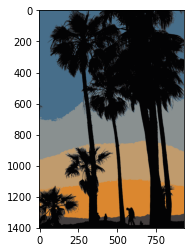

In [74]:
plt.imshow(quantized_image)